In [2]:
# importing required libraries

import numpy as np
import pandas as pd
import datetime
import math
import os


#Plots and graphs
import matplotlib.pyplot as plt  
import seaborn as sns

#Model building
from sklearn.model_selection import train_test_split 

#Pre-processing
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder

%matplotlib inline

In [3]:
%pwd
%cd "D:/Project (2)/"

#Load the dataset

# reading two csv files
data1 = pd.read_csv('product_details.csv')
data2 = pd.read_csv('pro_revenue.csv')
  
# using merge function by setting how='inner'
df = pd.merge(data1,data2,on='product type',how ='left')
  
# displaying result
df.head(10)

D:\Project (2)


,Unnamed: 0,product type,cost per unit,Time for delivery,Revenue,No of purchases,store status,Promotion applied,Generic Holiday,Education Holiday,DayOfWeek
0,0,1,457,11,14190,890,open,1,0,1,5
1,0,1,457,11,5020,546,open,1,0,1,4
2,0,1,457,11,4782,523,open,1,0,1,3
3,0,1,457,11,5011,560,open,1,0,1,2
4,0,1,457,11,6102,612,open,1,0,1,1
5,0,1,457,11,0,0,close,0,0,0,7
6,0,1,457,11,4364,500,open,0,0,0,6
7,0,1,457,11,3706,459,open,0,0,0,5
8,0,1,457,11,3769,503,open,0,0,0,4
9,0,1,457,11,3464,463,open,0,0,0,3


In [4]:
df.shape

(1017209, 11)

In [5]:
df.head()/

SyntaxError: invalid syntax (<ipython-input-5-a976c50f2895>, line 1)

In [ ]:
df.tail()

# Exploratory Data Analysis

In [6]:
df.dtypes

Unnamed: 0            int64
product type          int64
cost per unit         int64
Time for delivery     int64
Revenue               int64
No of purchases       int64
store status         object
Promotion applied     int64
Generic Holiday       int64
Education Holiday     int64
DayOfWeek             int64
dtype: object

In [7]:
# To get statistical data 

df.describe()

,Unnamed: 0,product type,cost per unit,Time for delivery,Revenue,No of purchases,Promotion applied,Generic Holiday,Education Holiday,DayOfWeek
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.574297e+02,5.584297e+02,1.012841e+03,9.543625e+00,5.773832e+03,6.331444e+02,3.815145e-01,3.052765e-02,1.786467e-01,3.998341e+00
std,3.219087e+02,3.219087e+02,5.655016e+02,2.857043e+00,3.849954e+03,4.644115e+02,4.857586e-01,1.720341e-01,3.830564e-01,1.997391e+00
min,0.000000e+00,1.000000e+00,5.000000e+01,5.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
25%,2.790000e+02,2.800000e+02,5.020000e+02,7.000000e+00,3.727000e+03,4.050000e+02,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00
50%,5.570000e+02,5.580000e+02,1.023000e+03,1.000000e+01,5.744000e+03,6.090000e+02,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
75%,8.370000e+02,8.380000e+02,1.519000e+03,1.200000e+01,7.856000e+03,8.370000e+02,1.000000e+00,0.000000e+00,0.000000e+00,6.000000e+00
max,1.114000e+03,1.115000e+03,1.999000e+03,1.400000e+01,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00,7.000000e+00


In [8]:
df.columns

Index(['Unnamed: 0', 'product type', 'cost per unit', 'Time for delivery',
       'Revenue', 'No of purchases', 'store status', 'Promotion applied',
       'Generic Holiday', 'Education Holiday', 'DayOfWeek'],
      dtype='object')

In [9]:
df.isnull().sum()

Unnamed: 0           0
product type         0
cost per unit        0
Time for delivery    0
Revenue              0
No of purchases      0
store status         0
Promotion applied    0
Generic Holiday      0
Education Holiday    0
DayOfWeek            0
dtype: int64

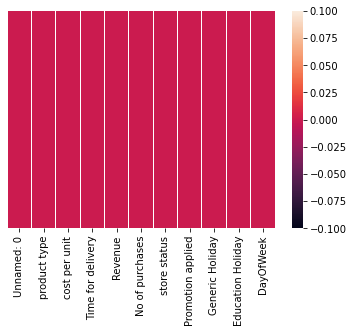

In [10]:
#we can also visualize null values with seaborn too. From the heatmap, it is clear that there are no null values.

sns.heatmap(df.isnull(),yticklabels=False)

# Checking for outliers

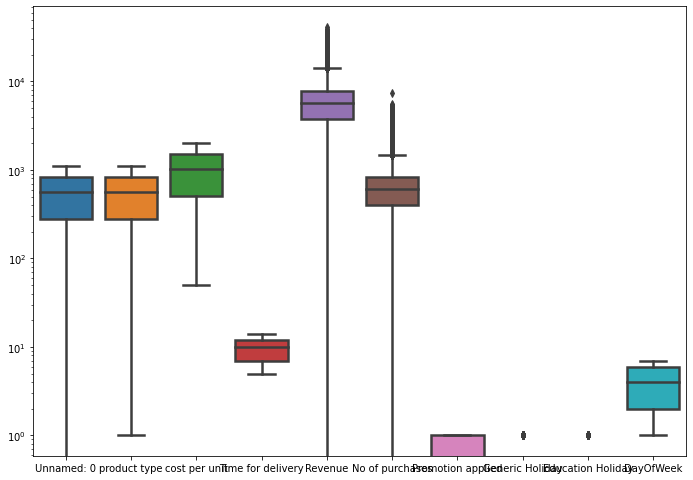

In [11]:
# To check outliers 
import matplotlib.pyplot as plt
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
g = sns.boxplot(data=df,linewidth=2.5,ax=ax)
g.set_yscale("log")

# Checking relation between all features

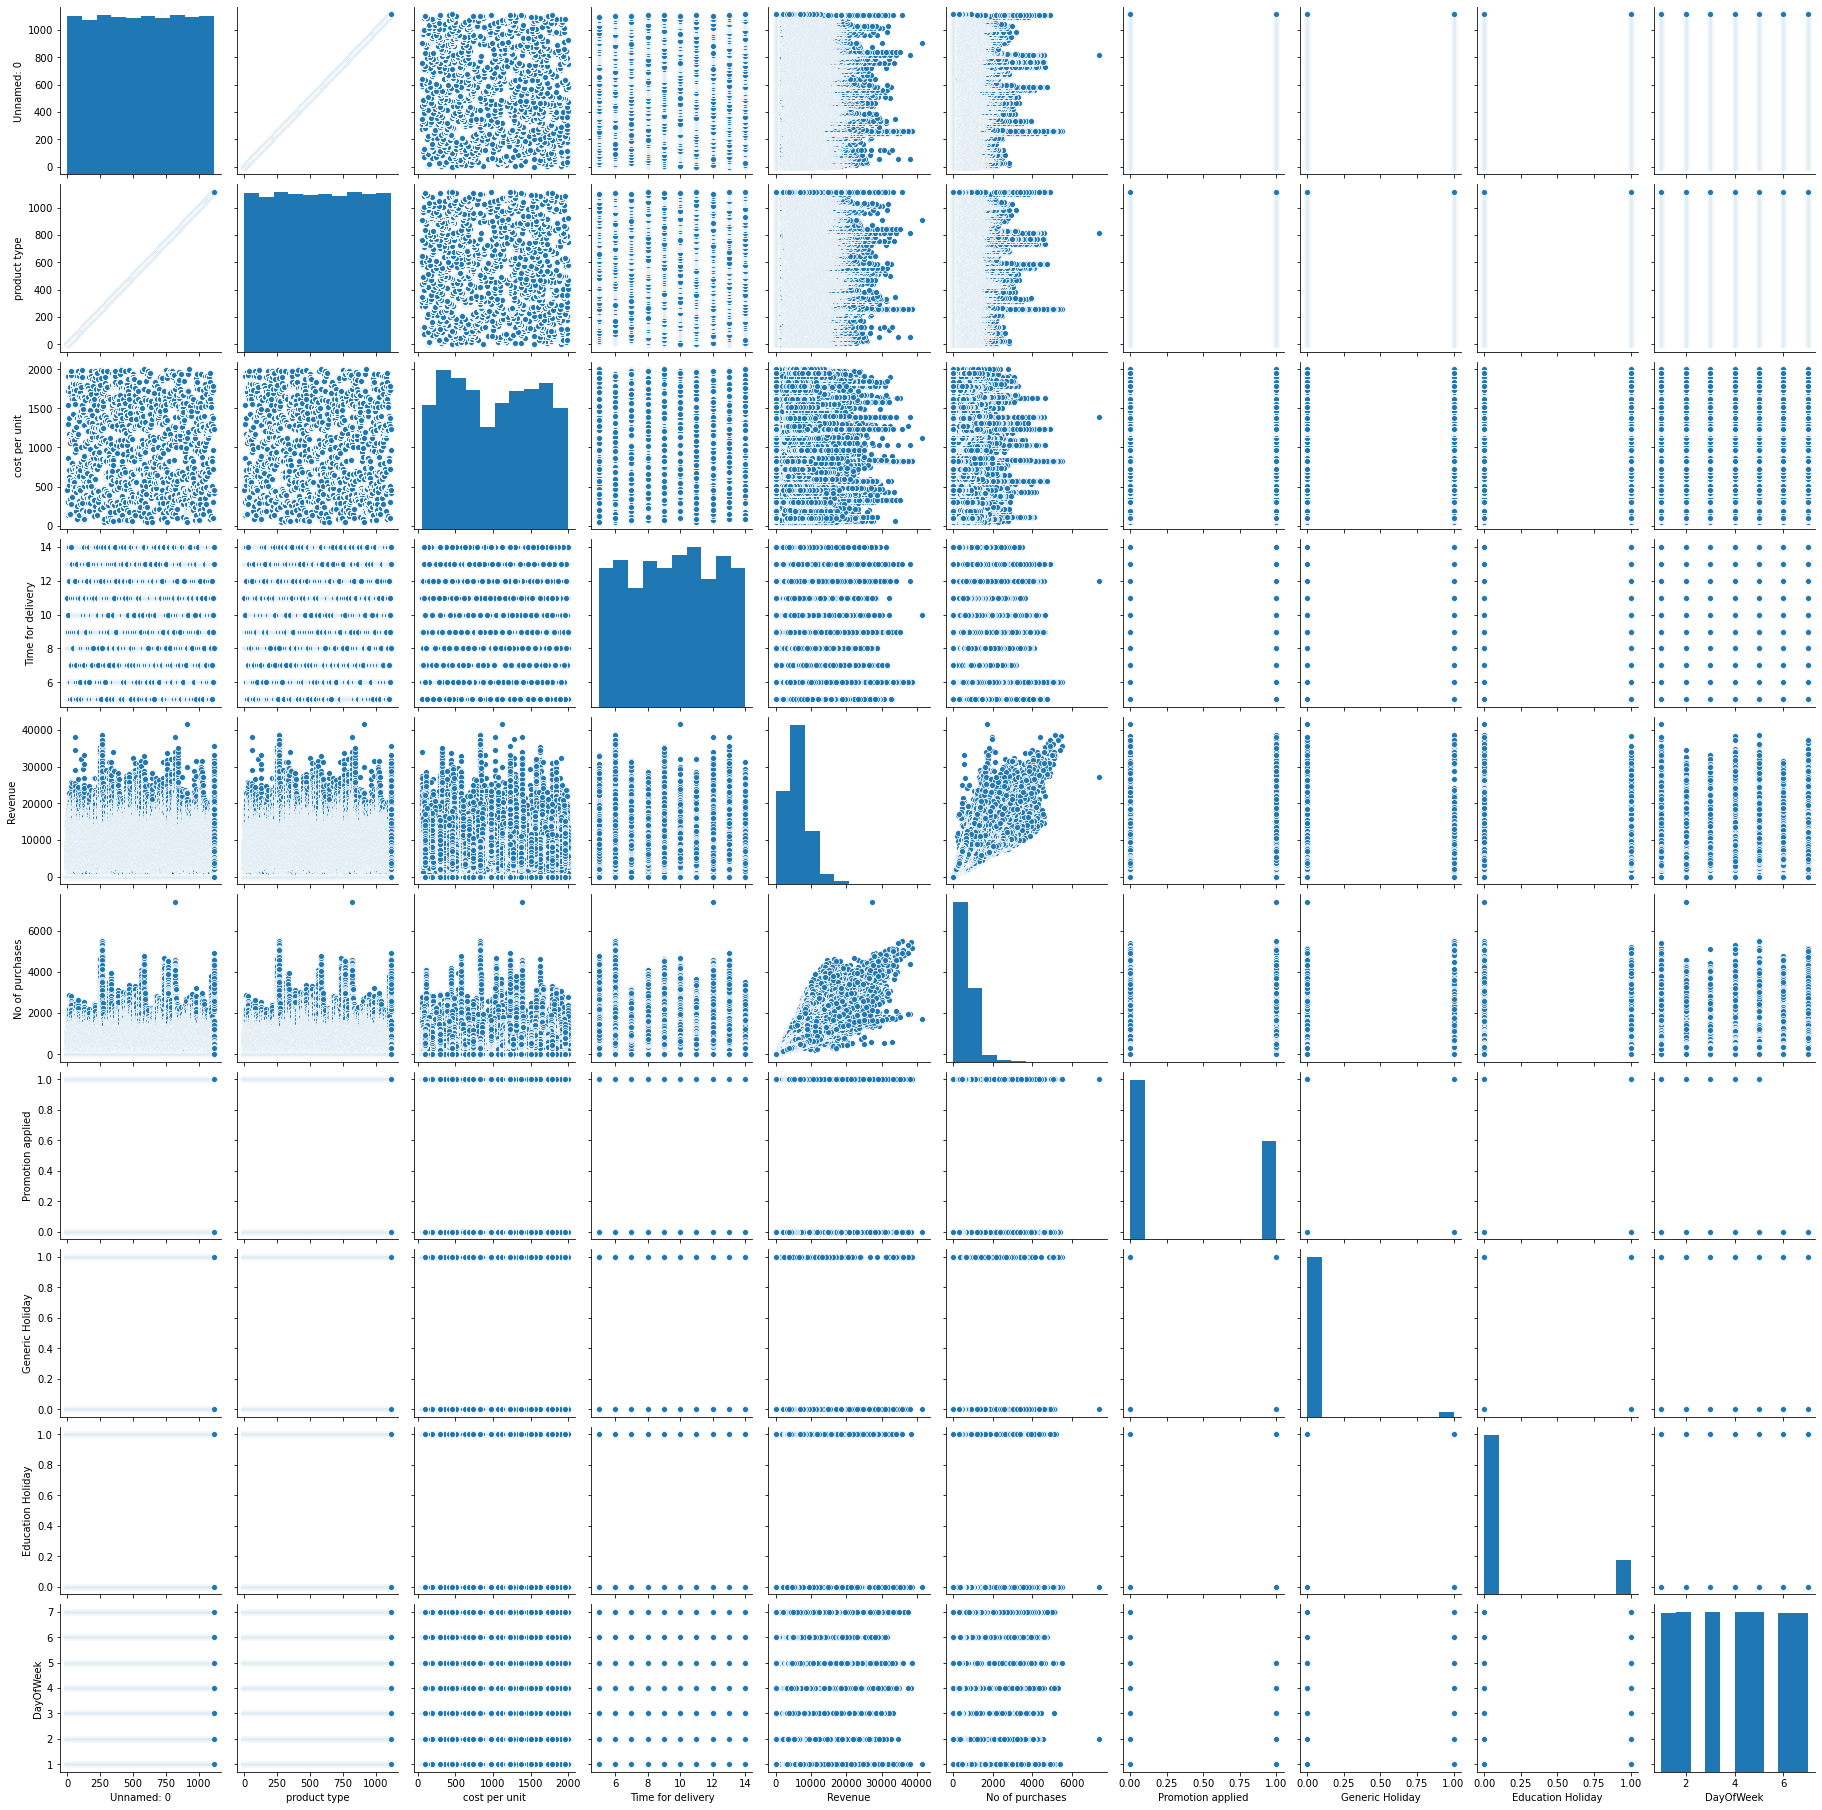

In [12]:
sns.pairplot(df)

# Checking For Correlation 

In [13]:
df.corr()

,Unnamed: 0,product type,cost per unit,Time for delivery,Revenue,No of purchases,Promotion applied,Generic Holiday,Education Holiday,DayOfWeek
Unnamed: 0,1.000000,1.000000,-0.042775,-0.018510,0.005119,0.024331,0.000058,0.000537,0.000641,-0.000008
product type,1.000000,1.000000,-0.042775,-0.018510,0.005119,0.024331,0.000058,0.000537,0.000641,-0.000008
cost per unit,-0.042775,-0.042775,1.000000,0.020338,0.003452,0.000673,0.000008,-0.000084,0.001415,-0.000001
Time for delivery,-0.018510,-0.018510,0.020338,1.000000,-0.008501,0.003093,0.000016,-0.001020,-0.000055,-0.000002
Revenue,0.005119,0.005119,0.003452,-0.008501,1.000000,0.894702,0.452346,-0.254152,0.085136,-0.462120
No of purchases,0.024331,0.024331,0.000673,0.003093,0.894702,1.000000,0.316165,-0.226552,0.071564,-0.386447
Promotion applied,0.000058,0.000058,0.000008,0.000016,0.452346,0.316165,1.000000,-0.012331,0.067483,-0.392925
Generic Holiday,0.000537,0.000537,-0.000084,-0.001020,-0.254152,-0.226552,-0.012331,1.000000,0.148696,-0.052912
Education Holiday,0.000641,0.000641,0.001415,-0.000055,0.085136,0.071564,0.067483,0.148696,1.000000,-0.205388
DayOfWeek,-0.000008,-0.000008,-0.000001,-0.000002,-0.462120,-0.386447,-0.392925,-0.052912,-0.205388,1.000000


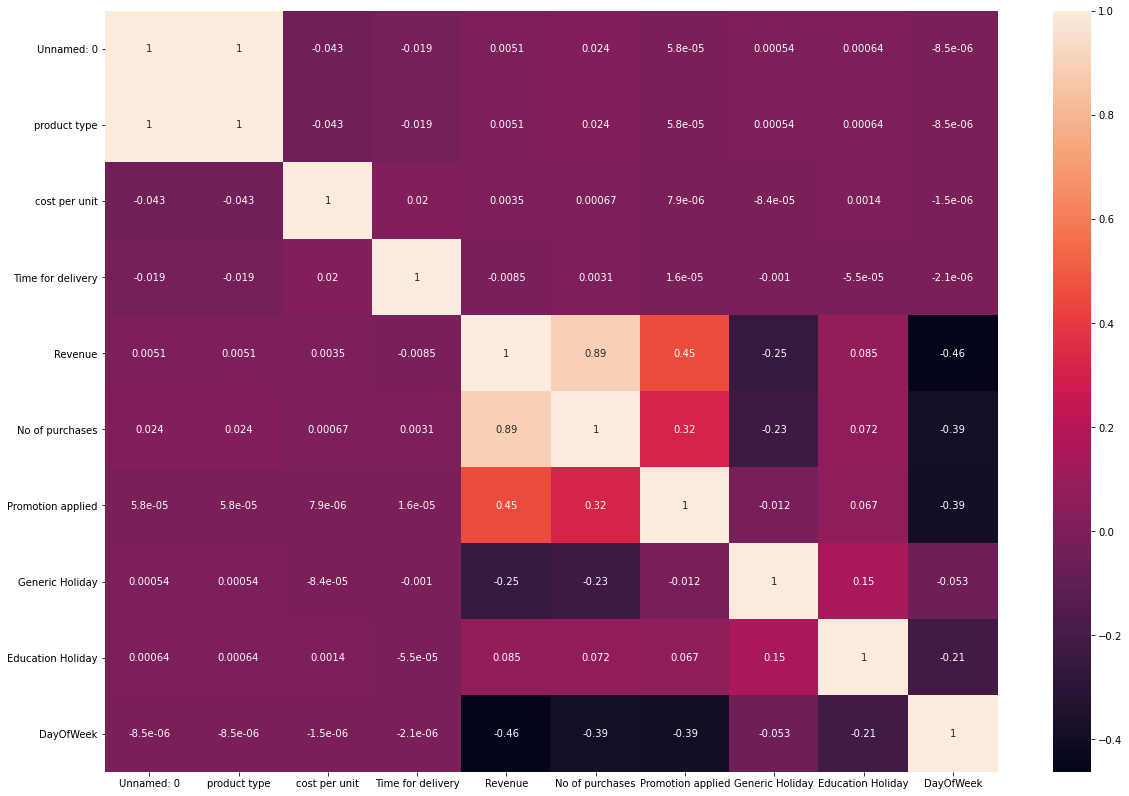

In [14]:
# Finds correlation between Independent and dependent attributes
axis = plt.subplots(figsize=(20,14))
sns.heatmap(df.corr(),annot = True)
plt.show()

             Revenue and No Of Purchages have very High correlation i,e 0.89%

# Aggregation of values based on day of week 

In [15]:
df.groupby(df["DayOfWeek"]).Revenue.agg(["min",
                                            "max",
                                            "sum",
                                            "count",
                                            "mean"])

,min,max,sum,count,mean
DayOfWeek,,,,,
1,0,41551,1130203012,144730,7809.044510
2,0,34692,1020411930,145664,7005.244467
3,0,33151,954962863,145665,6555.884138
4,0,38367,911177709,145845,6247.575913
5,0,38722,980569633,145845,6723.368185
6,0,31683,846317735,144730,5847.562599
7,0,37376,29551433,144730,204.183189


# Preprocessing of Data

first column atrribute is not playing any role so we can drop that column

In [16]:
df=df.drop('Unnamed: 0', axis=1) 
df.head(2)

,product type,cost per unit,Time for delivery,Revenue,No of purchases,store status,Promotion applied,Generic Holiday,Education Holiday,DayOfWeek
0,1,457,11,14190,890,open,1,0,1,5
1,1,457,11,5020,546,open,1,0,1,4


# Handling of Categorical Attributes

In [17]:
df["store status"].value_counts()

open     844390
close    172819
Name: store status, dtype: int64

In [18]:
df["Generic Holiday"].unique()

array([0, 1], dtype=int64)

In [19]:
df["Generic Holiday"]=df["Generic Holiday"].replace(['a','b','c'],"1")
df["Generic Holiday"]=df["Generic Holiday"].replace(0,"0")
df["Generic Holiday"].value_counts()

0    986156
1     31053
Name: Generic Holiday, dtype: int64

In [21]:
df["Generic Holiday"].unique()

array([0, 1])

In [20]:
df["Generic Holiday"] = df["Generic Holiday"].astype(str).astype(int)

# Feature Engineering

In [22]:
df["No_of_sales"] = df["Revenue"] / df["cost per unit"]
df.head()

,product type,cost per unit,Time for delivery,Revenue,No of purchases,store status,Promotion applied,Generic Holiday,Education Holiday,DayOfWeek,No_of_sales
0,1,457,11,14190,890,open,1,0,1,5,31.050328
1,1,457,11,5020,546,open,1,0,1,4,10.984683
2,1,457,11,4782,523,open,1,0,1,3,10.463895
3,1,457,11,5011,560,open,1,0,1,2,10.964989
4,1,457,11,6102,612,open,1,0,1,1,13.352298


In [23]:
df.shape

(1017209, 11)

In [24]:
df['No_of_sales'] = df['No_of_sales'].astype(int)

In [25]:
df.head()

,product type,cost per unit,Time for delivery,Revenue,No of purchases,store status,Promotion applied,Generic Holiday,Education Holiday,DayOfWeek,No_of_sales
0,1,457,11,14190,890,open,1,0,1,5,31
1,1,457,11,5020,546,open,1,0,1,4,10
2,1,457,11,4782,523,open,1,0,1,3,10
3,1,457,11,5011,560,open,1,0,1,2,10
4,1,457,11,6102,612,open,1,0,1,1,13


In [26]:
df['No_of_units'] = df['No_of_sales']*0.1

In [27]:
df.head()

,product type,cost per unit,Time for delivery,Revenue,No of purchases,store status,Promotion applied,Generic Holiday,Education Holiday,DayOfWeek,No_of_sales,No_of_units
0,1,457,11,14190,890,open,1,0,1,5,31,3.1
1,1,457,11,5020,546,open,1,0,1,4,10,1.0
2,1,457,11,4782,523,open,1,0,1,3,10,1.0
3,1,457,11,5011,560,open,1,0,1,2,10,1.0
4,1,457,11,6102,612,open,1,0,1,1,13,1.3


In [28]:
df["INVENTORY"] = df["No_of_sales"] + df["No_of_units"]
df.head()

,product type,cost per unit,Time for delivery,Revenue,No of purchases,store status,Promotion applied,Generic Holiday,Education Holiday,DayOfWeek,No_of_sales,No_of_units,INVENTORY
0,1,457,11,14190,890,open,1,0,1,5,31,3.1,34.1
1,1,457,11,5020,546,open,1,0,1,4,10,1.0,11.0
2,1,457,11,4782,523,open,1,0,1,3,10,1.0,11.0
3,1,457,11,5011,560,open,1,0,1,2,10,1.0,11.0
4,1,457,11,6102,612,open,1,0,1,1,13,1.3,14.3


In [30]:
df['INVENTORY'] = df["INVENTORY"].astype(int)

In [31]:
df.head()

,product type,cost per unit,Time for delivery,Revenue,No of purchases,store status,Promotion applied,Generic Holiday,Education Holiday,DayOfWeek,No_of_sales,No_of_units,INVENTORY
0,1,457,11,14190,890,open,1,0,1,5,31,3.1,34
1,1,457,11,5020,546,open,1,0,1,4,10,1.0,11
2,1,457,11,4782,523,open,1,0,1,3,10,1.0,11
3,1,457,11,5011,560,open,1,0,1,2,10,1.0,11
4,1,457,11,6102,612,open,1,0,1,1,13,1.3,14


In [32]:
df.groupby(["product type"]).sum().sort_values("No_of_sales", ascending=True).head(10)

,cost per unit,Time for delivery,Revenue,No of purchases,Promotion applied,Generic Holiday,Education Holiday,DayOfWeek,No_of_sales,No_of_units,INVENTORY
product type,,,,,,,,,,,
210,1868928,9420,2488114,254156,360,29,150,3766,896,89.6,896
32,1501598,9854,2526117,296333,286,29,124,3033,968,96.8,968
764,1827480,5652,2714404,303938,360,29,150,3766,996,99.6,996
219,1640964,8478,2441162,316620,360,29,170,3766,997,99.7,997
1049,1378044,6822,2478906,395752,286,29,124,3033,1000,100.0,1000
425,1671108,13188,2512424,337080,360,29,170,3766,1024,102.4,1024
263,1285568,4548,2306075,221342,286,29,124,3033,1040,104.0,1040
306,1504630,7580,2717435,291021,286,29,124,3033,1073,107.3,1073
837,1696542,6594,2608765,345575,360,27,193,3766,1096,109.6,1096


In [33]:
df = df.drop("No of purchases", 1)

In [34]:
df = df.drop("Time for delivery", 1)

In [35]:
df = df.drop("cost per unit", 1)

In [36]:
df = df.drop("Education Holiday", 1)

In [37]:
df = df.drop("store status", 1)

In [38]:
df = df.drop("No_of_sales", 1)

In [39]:
df = df.drop("No_of_units", 1)

In [40]:
df = df.drop("Revenue", 1)

In [41]:
df.head()

,product type,Promotion applied,Generic Holiday,DayOfWeek,INVENTORY
0,1,1,0,5,34
1,1,1,0,4,11
2,1,1,0,3,11
3,1,1,0,2,11
4,1,1,0,1,14


In [42]:
X = df.loc[:, ['product type',"Promotion applied","Generic Holiday",
        'DayOfWeek']]

X.head()

,product type,Promotion applied,Generic Holiday,DayOfWeek
0,1,1,0,5
1,1,1,0,4
2,1,1,0,3
3,1,1,0,2
4,1,1,0,1


In [45]:
Y = df.iloc[:, 4]
Y.head()

0    34
1    11
2    11
3    11
4    14
Name: INVENTORY, dtype: int32

In [46]:
Y.shape

(1017209,)

# Box plot For Checking Outliers

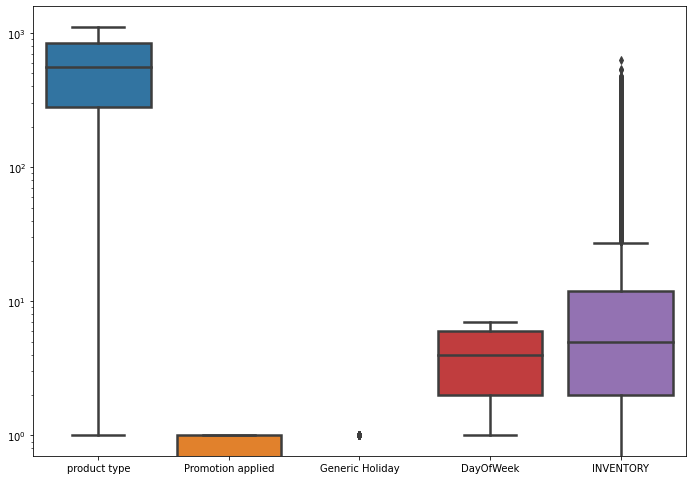

In [47]:
# To check outliers 
import matplotlib.pyplot as plt


a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
g = sns.boxplot(data=df,linewidth=2.5,ax=ax)
g.set_yscale("log")

  # Removing Outliers

# I. Method-IQR method (Box Plot)

In [48]:
def outlier(datacolumn):
    sorted(datacolumn)
    Q1,Q3 = np.percentile(datacolumn, [25,75])
    IQR = Q3-Q1
    lower_range = Q1 - (1.5*IQR)
    upper_range = Q3 + (1.5*IQR)
    return lower_range,upper_range

In [50]:
df.shape

(1017209, 5)

In [51]:
a = set()
for i in df.columns:
    lower, higher = outlier(df[i])
    l = df.loc[(df[i]<lower)| (df[i] > higher)].index
    for j in list(l):
        a.add(j)

In [52]:
print('Identified outliers: %d' % len(a))

Identified outliers: 122522


In [53]:
df.drop(a,axis = 0, inplace = True)

In [54]:
df.shape

(894687, 5)

# Normalization of data

C:\Users\giris\anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


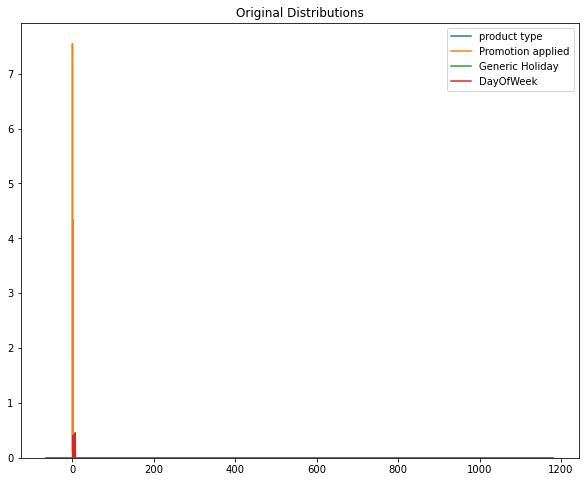

In [55]:
# plot original distribution plot with larger value feature
fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('Original Distributions')

sns.kdeplot(df['product type'], ax=ax1)
sns.kdeplot(df['Promotion applied'], ax=ax1)
sns.kdeplot(df['Generic Holiday'], ax=ax1)
sns.kdeplot(df['DayOfWeek'], ax=ax1);

In [56]:
from sklearn import preprocessing
import warnings

warnings.filterwarnings('ignore')

In [59]:
X

,product type,Promotion applied,Generic Holiday,DayOfWeek
0,1,1,0,5
1,1,1,0,4
2,1,1,0,3
3,1,1,0,2
4,1,1,0,1
...,...,...,...,...
1017204,1115,0,0,6
1017205,1115,0,0,5
1017206,1115,0,0,4
1017207,1115,0,0,3


# Robust Scaler Transform

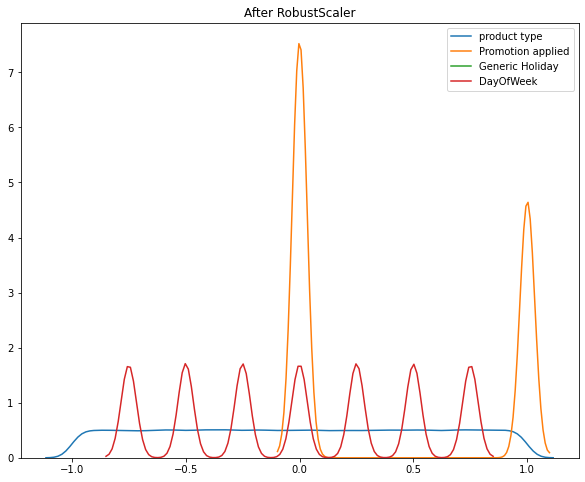

In [60]:
r_scaler = preprocessing.RobustScaler()
df_r = r_scaler.fit_transform(X)

df_r = pd.DataFrame(df_r,columns=["product type","Promotion applied","Generic Holiday","DayOfWeek"])

fig, (ax2) = plt.subplots(ncols=1, figsize=(10, 8))
ax2.set_title('After RobustScaler')

sns.kdeplot(df_r['product type'], ax=ax2)
sns.kdeplot(df_r['Promotion applied'], ax=ax2)
sns.kdeplot(df_r['Generic Holiday'], ax=ax2)
sns.kdeplot(df_r['DayOfWeek'], ax=ax2);

In [61]:
mins = [df_r[col].min() for col in df_r.columns]
mins

[-0.9982078853046595, 0.0, 0.0, -0.75]

In [62]:
maxs = [df_r[col].max() for col in df_r.columns]
maxs

[0.9982078853046595, 1.0, 1.0, 0.75]

In [79]:
#divide our data into training and test sets:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_r, y, test_size = 0.2, random_state = 42)

In [80]:
X_train

,product type,Promotion applied,Generic Holiday,DayOfWeek
417683,-0.179211,0.0,0.0,0.75
659402,0.299283,0.0,0.0,0.25
739873,0.455197,1.0,0.0,-0.75
109671,-0.783154,0.0,0.0,0.00
422541,-0.170251,0.0,0.0,0.50
...,...,...,...,...
259178,-0.487455,0.0,0.0,-0.50
365838,-0.281362,1.0,0.0,0.25
131932,-0.738351,0.0,0.0,-0.25
671155,0.320789,1.0,0.0,-0.50


In [82]:
X_test

,product type,Promotion applied,Generic Holiday,DayOfWeek
76435,-0.849462,0.0,0.0,-0.75
923026,0.815412,0.0,0.0,0.50
731180,0.439068,0.0,0.0,0.25
790350,0.553763,1.0,0.0,0.00
252134,-0.501792,0.0,0.0,0.50
...,...,...,...,...
574924,0.130824,0.0,0.0,0.00
752038,0.480287,0.0,0.0,-0.25
38978,-0.922939,0.0,0.0,0.25
193217,-0.616487,0.0,0.0,-0.50


In [83]:
y_train

417683     0
659402    39
739873    34
109671     6
422541     3
          ..
259178     2
365838     4
131932    30
671155     6
121958     2
Name: INVENTORY, Length: 813767, dtype: int32

In [84]:
y_test

76435     12
923026     2
731180    18
790350     2
252134    15
          ..
574924     4
752038     3
38978      6
193217    34
260336     8
Name: INVENTORY, Length: 203442, dtype: int32

# Model Building Phase:

# 1. Linear Regression:

In [85]:
X_train.shape, y_train.shape

((813767, 4), (813767,))

In [86]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lmmodel= lm.fit(X_train, y_train)
#To make predictions on the test set, use the predict method:
y_pred = lmmodel.predict(X_test)

In [87]:
lm.score(X_test, y_test)

0.04870712273826039

In [88]:
#Evaluating the Algorithm
from sklearn import metrics
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Root Mean Squared Error: 20.24150894395411


In [89]:
#Now let's compare some of our predicted values with the actual values and see how accurate we were:
df=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
df.head()

,Actual,Predicted
76435,12,13.018726
923026,2,7.617260
731180,18,8.670386
790350,2,14.980526
252134,15,6.792134


# 2.DecisionTreeRegressor Algorithm

In [90]:
#Training and Making Predictions
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)
print("DTRegressor Score: ", regressor.score(X_train,y_train))

DTRegressor Score:  0.9593439072547996


In [91]:
#To make predictions on the test set, use the predict method:
y_pred = regressor.predict(X_test)

In [92]:
#Now let's compare some of our predicted values with the actual values and see how accurate we were:
df=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
df.head()

,Actual,Predicted
76435,12,15.906977
923026,2,1.980198
731180,18,18.408163
790350,2,3.236364
252134,15,13.953271


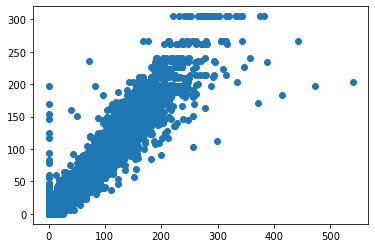

In [93]:
#checking predicted y and labeled Actual y using a scatter plot.
plt.scatter(y_test,y_pred)

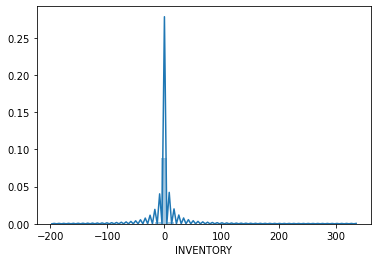

In [94]:
# checking difference between labled y and predicted y
sns.distplot(y_test-y_pred)

In [95]:
#Evaluating the Algorithm
from sklearn import metrics
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Root Mean Squared Error: 4.170983718463723


# RandomForestRegressor

In [105]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

rf = RandomForestRegressor()
rfmodel = rf.fit(X_train, y_train) # Fit 'rf' to the training set
y_pred = rfmodel.predict(X_test) # Predict the test set labels 'y_pred'
print("rf score: ",rf.score(X_test, y_test)) # Evaluate the test set 

#Evaluating the Algorithm
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

rf score:  0.9595569491998406
Mean Absolute Error: 1.4504650049720698
Mean Squared Error: 17.41868772502086
Root Mean Squared Error: 4.173570141380262


In [106]:
#Now let's compare some of our predicted values with the actual values and see how accurate we were:
df=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
df.head()

,Actual,Predicted
76435,12,15.970743
923026,2,1.984333
731180,18,18.539700
790350,2,3.231653
252134,15,13.954602


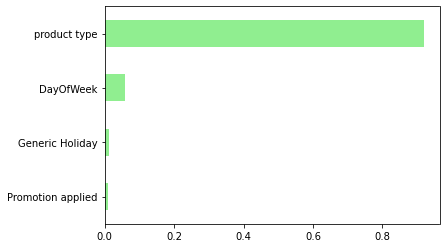

In [107]:
import pandas as pd
import matplotlib.pyplot as plt
# Create a pd.Series of features importances
importances_rf = pd.Series(rf.feature_importances_, index = X_train.columns)
# Sort importances_rf
sorted_importances_rf = importances_rf.sort_values()
# Make a horizontal bar plot
sorted_importances_rf.plot(kind='barh', color='lightgreen');
plt.show()

# Hyper Parameter Tuning

In [108]:
from sklearn.model_selection import RandomizedSearchCV

In [109]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(df) for df in np.linspace(start = 10, stop = 30, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(df) for df in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [110]:
# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [111]:
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [112]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=24, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=24, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=  24.9s
[CV] n_estimators=24, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   24.8s remaining:    0.0s


[CV]  n_estimators=24, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=  24.4s
[CV] n_estimators=24, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=24, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=  22.8s
[CV] n_estimators=24, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=24, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=  21.3s
[CV] n_estimators=24, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=24, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=  22.0s
[CV] n_estimators=28, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=28, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=  35.7s
[CV] n_estimators=28, min_samples_split=10, min_samples_lea

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed: 18.8min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [10, 11, 13, 15, 17, 19,
                                                         20, 22, 24, 26, 28,
                                                         30]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [113]:
rf_random.best_params_

{'n_estimators': 26,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 25}

In [114]:
p=rf_random.predict(X_test)

In [116]:
import sklearn.metrics as metrics

In [117]:
metrics.r2_score(y_test,p)

0.8882569799164458

In [118]:
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Root Mean Squared Error: 4.173570141380262
